## Final project

text stuff to do: 
- clean encoding (ÛÏ) 
- count hashtags, @ signs, urls, punctuation, sentence to punctuation ratio
- :pparrot: emojis???
- general research to tokenize tweets & try out different tokenizing methods
- remove punctuation 
- use SVD to condense, try PCA
- remove stuff to make it look like final project
- research to see how we can use location or keywords

ask john:
- best way to clean encoding
- how to add features to model

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from pathlib import Path
import spacy

In [18]:
repo = Path(os.getcwd())
data_path = repo / '..' / 'data'

In [19]:
df = pd.read_csv(data_path / '02_clean' / 'train.csv')

In [20]:
nlp = spacy.load("en_core_web_lg")

In [21]:
vector_features = []
for tweet in list(df['tweet']):
    token_tweet = nlp(tweet)
    vector_features.append(token_tweet.vector)

In [22]:
train = pd.DataFrame(vector_features)

In [23]:
fe = df[['uprchar_pct', 'lwrchar_pct', 'lwrcase_pct',
                          'upprcase_pct', 'titlecase_pct']]
kw = pd.get_dummies(df['keyword'], prefix = 'kw')

In [28]:
train = pd.concat([train,fe,kw],axis=1)

In [29]:
from sklearn.model_selection import train_test_split

X = train
y = df["target"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
x_train = X_train
x_test = X_test

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

tweet_classifier = LogisticRegression(random_state = 0, max_iter=300).fit(x_train, y_train)

In [37]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

# precision, recall, f1, and average precision below
y_pred = tweet_classifier.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.78
Recall: 0.73
F1: 0.75
Average Precision: 0.68


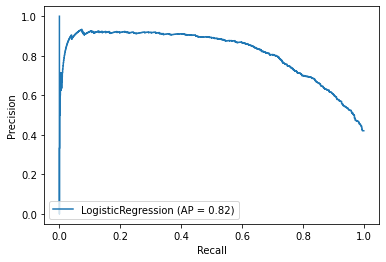

In [38]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# plot precision-recall curve
y_pred_prob = review_classifier.predict_proba(x_test)
precision_recall_curve_values = precision_recall_curve(y_test, y_pred_prob[:,1])
plot_precision_recall_curve(estimator=review_classifier, X=x_test, y=y_test)

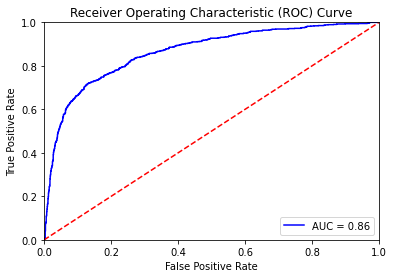

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# plot ROC
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_clf = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

In [42]:
y_pred = dt_clf.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.65
Recall: 0.69
F1: 0.67
Average Precision: 0.58


### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf_clf = RandomForestClassifier(n_jobs=2, random_state=0).fit(x_train, y_train)

In [47]:
y_pred = rf_clf.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.84
Recall: 0.65
F1: 0.73
Average Precision: 0.69


### MLP Neural Net Classifier

In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
mlp_clf = MLPClassifier(random_state=0, max_iter=300).fit(x_train, y_train)

In [50]:
y_pred = mlp_clf.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.7
Recall: 0.76
F1: 0.73
Average Precision: 0.63
